In [1]:
import getpass

# NB: host url is not prepended with \"https\" nor does it have a trailing slash.
STABILITY_HOST = 'grpc.stability.ai:443'

# To get your API key, visit https://beta.dreamstudio.ai/membership
STABILITY_KEY = getpass.getpass('Enter your API Key')

In [2]:
import io
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
from stability_sdk.client import generation


stability_api = client.StabilityInference(
    host=STABILITY_HOST,
    key=STABILITY_KEY,
    verbose=True,
)

ValueError: key is required for grpc.stability.ai:443

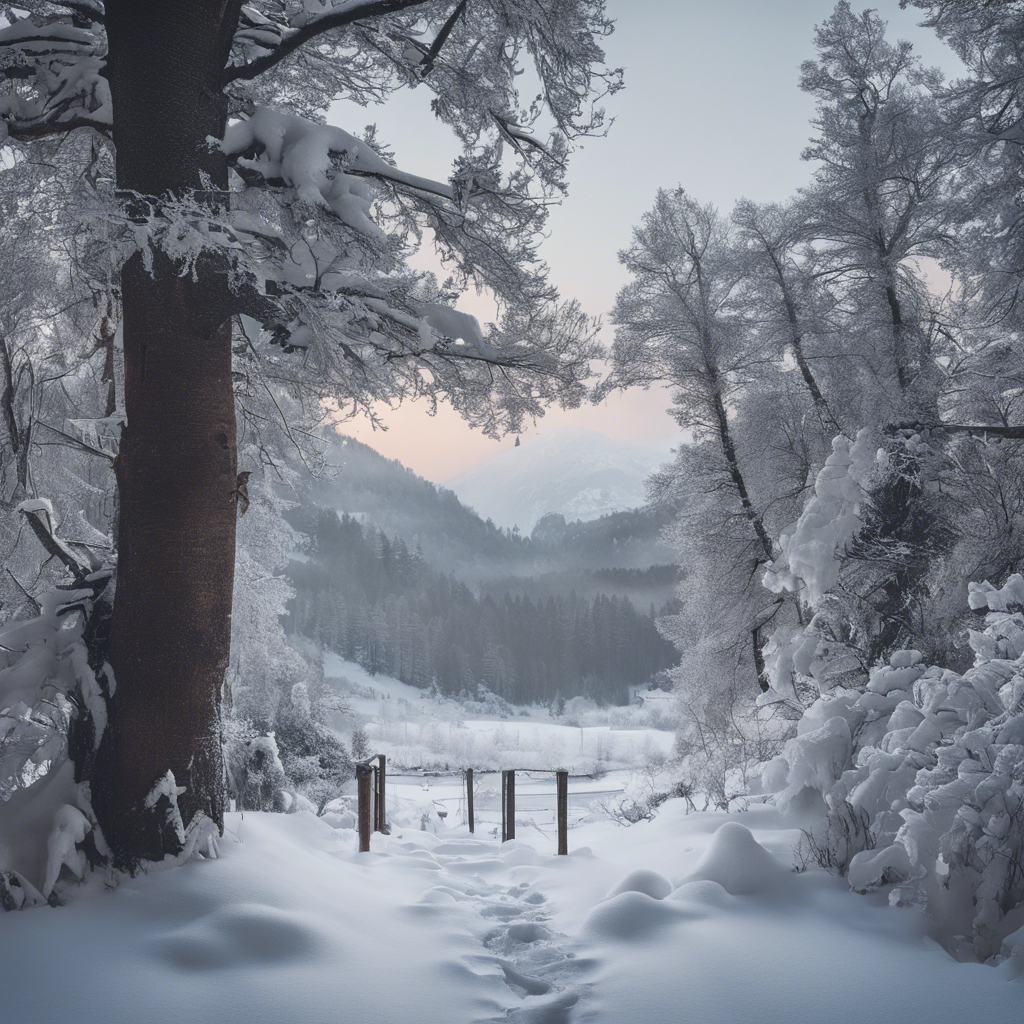

In [ ]:
# the object returned is a python generator
answers = stability_api.generate(
    prompt="cool",
    seed=121245125, # if provided, specifying a random seed makes results deterministic
    steps=50, # defaults to 30 if not specified
)

# iterating over the generator produces the api response
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)

In [ ]:
for i in answers:
    print(i)